# Maxwell-Boltzmann Distributions

Let's take a box which has some atoms inside. The atoms are in the vapour phase, and we can consider it an ideal gas. In this case the Maxwell-Boltzmann distribution tells us how fast the atoms are moving. The speed distribution obeys the relationship,

$$ f_i(v) = A e^{{-\beta E_i(v_i)}}$$

or, if we assume that the kinetic energy dominates $E_i = \frac{1}{2}mv_i^2$ and $\beta = \frac{1}{k_B T}$, where $k_B=1.38064852 \times 10^{-23} m^2 s^{-2} kg\,  K^{-1}$ and the distribution is normalized to unit area, then:

$$ f_v(v) = \left(\frac{m}{2\pi k_B T}\right)^{3/2} \; 4\pi v_i^2 \; \exp\left({\frac{-mv_i^2}{2k_B T}}\right) $$

that is, the fraction of atoms $f_v$ with velocity $v$, $k_B$ is Boltzmann's constant, $T$ is the thermodynamic temperature (in Kelvin) and $m$ is the mass of the atoms. 

Let's build up what that distribution should look like, and then change the temperature!

## Function for the distribution

How should this be constructed? What should it depend on?

In [1]:
import scipy as scipy
import numpy as np

In [8]:
def MBspeed(temp, velocity = 1, mass = 1):
    """ Maxwell-Boltzmann speed distribution for speeds """

    #1. Relevant constants
    #1. Parameters of interest
    #    1. Temperature
    #    1. Velocity
    #    1. Mass? 
    #1. Calculate the MaxBol PDF

    # Calculate the parenthetical factor preceding the exponential
    kT = scipy.constants.k*temp
    denom = (2*np.pi*kT)
    prefactor = 0
    if (denom > 0): 
        prefactor = (mass / denom)**(3/2)

    # Calculate the 4 pi v^2
    prefactor = prefactor*4*np.pi*(velocity**2)

    # Calculate the exponential
    myexp = np.exp((-mass*(velocity**2))/(2*kT))
                   
    
    return prefactor*myexp

## Plotting the distribution

Setup the libraries as usual.

In [9]:
# Import the required modules
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Set some constants that we may want

In [10]:
amu  = 1.66e-27
mass = 85*amu

In [11]:
MBspeed(270,300,mass)

np.float64(0.0030448538909568254)

For the actual plot, we'll want to:
1. setup the $x$-axis (which, in this case, is velocity, $v$) as an array
1. vary the temperature across a few values
1. vary the mass across a few values
1. plot each on the same axes

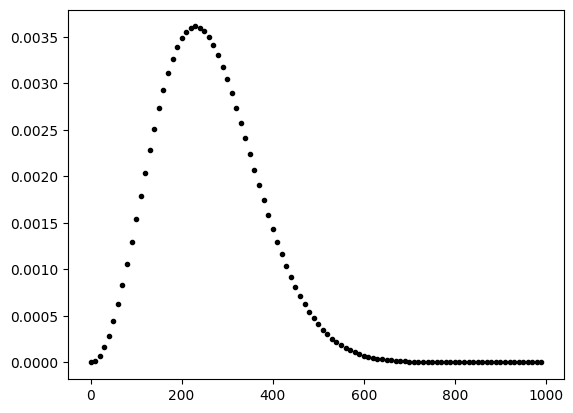

In [12]:
fig  = plt.figure()
ax   = fig.add_subplot(111)

amu      = 1.66e-27
mass     = 85*amu
temp     = 270
velrange = 1000
velstep  = 10

myrange = np.arange(0,velrange,velstep)
probVel = MBspeed(temp,myrange,mass)

plt.plot(myrange, probVel, marker='.', color='k', linestyle='none')

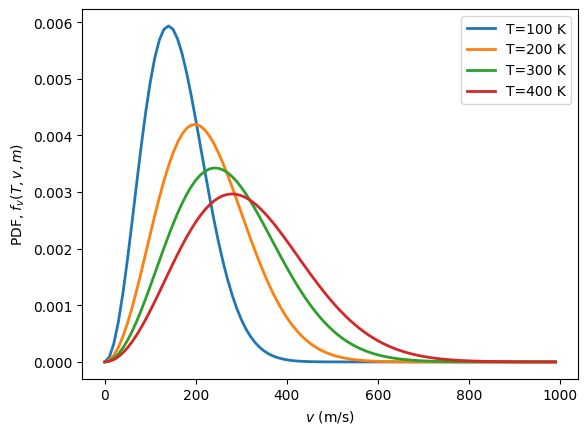

In [14]:
fig  = plt.figure()
ax   = fig.add_subplot(111)

for T in [100,200,300,400]:
    fv = MBspeed(T,myrange,mass)
    ax.plot(myrange,fv,label='T='+str(T)+' K',lw=2)

ax.legend(loc=0)
ax.set_xlabel('$v$ (m/s)')
ax.set_ylabel('PDF, $f_v(T,v,m)$')
plt.draw()

# Naive python accept / reject

This is meant to be an easily readable implementation of the accept / reject algorithm. It's easy to understand not very fast.


In [15]:
def accept_reject(N):
    """ accept-reject method for randomly sampling a distribution """
    xmin = 0
    xmax = 800

    n_accept=0
    x_list = [] 
    while n_accept < N:
        t = (xmax-xmin)*np.random.rand() + xmin
        y = np.random.rand()
        if y < MBspeed():
            n_accept += 1
            x_list.append(t)
    return x_list

In [16]:
x = accept_reject(100)
bins, edges, patches = plt.hist(x, bins=100)
plt.show()

TypeError: MBspeed() missing 1 required positional argument: 'temp'